In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Cancer_Prediction.csv")
df = df.dropna()

# Features and target
X = df.drop(["Diagnosis"], axis=1)
y = df["Diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest model
rf = RandomForestClassifier(n_estimators=300, random_state=50)
rf.fit(X_train, y_train)

# Accuracy on train and test
train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc = accuracy_score(y_test, rf.predict(X_test))

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Overfitting check
if train_acc - test_acc > 0.1:
    print("⚠️ Model may be overfitting!")
else:
    print("✅ Model generalizes well.")


Train Accuracy: 1.0
Test Accuracy: 0.9466666666666667
✅ Model generalizes well.


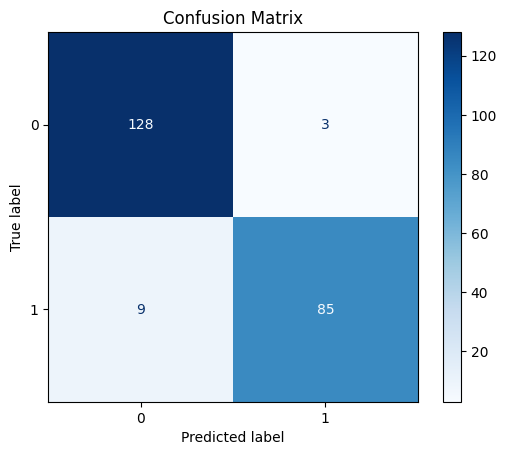

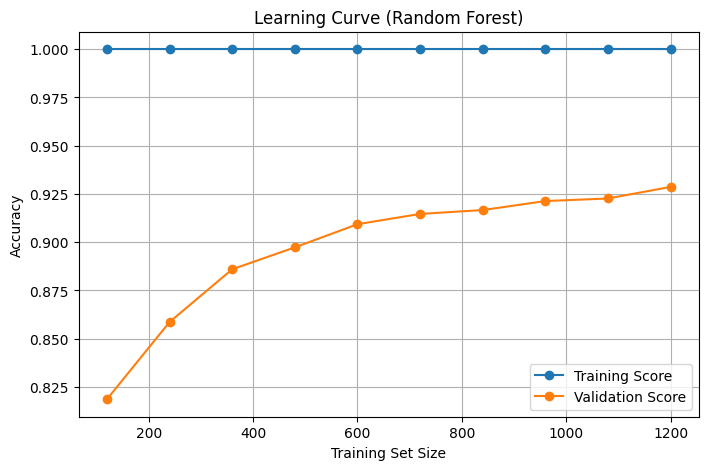

In [42]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring="accuracy", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

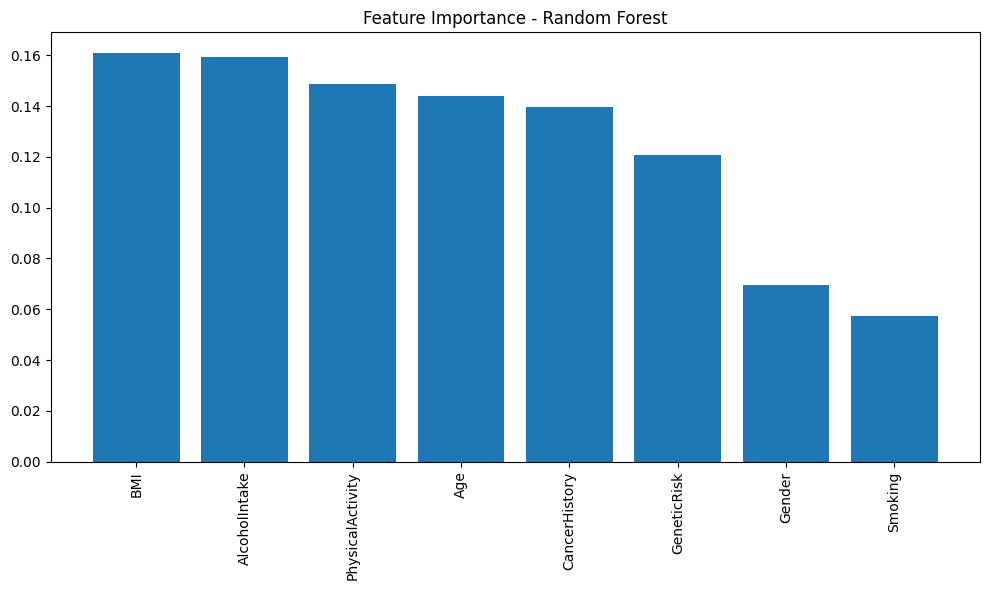

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


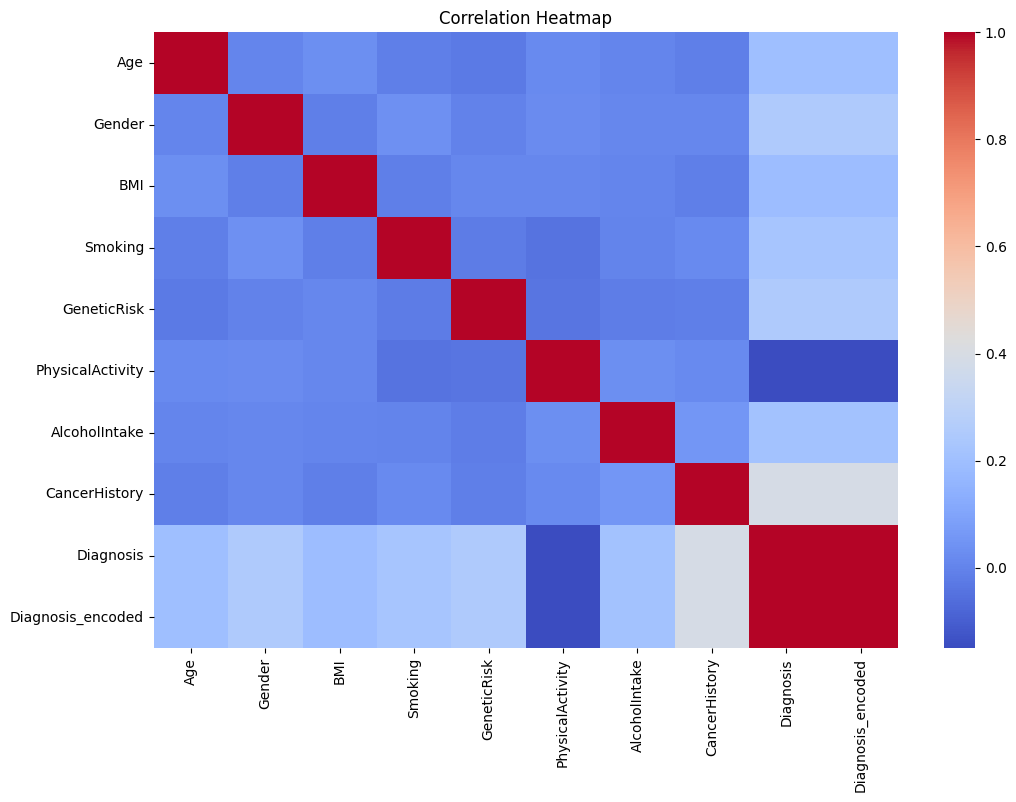

In [44]:
import seaborn as sns

# Encode target if categorical
df['Diagnosis_encoded'] = df['Diagnosis'].astype('category').cat.codes

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [45]:
import joblib

# Save model
joblib.dump(rf, "cancer_model.pkl")
print("✅ Model saved as cancer_model.pkl")

# Save scaler too (since test data must also be standardized)
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")


✅ Model saved as cancer_model.pkl
✅ Scaler saved as scaler.pkl
